In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_76\2950996752.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [3]:
star_url ="https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [4]:
# selenium 4 버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# 지역검색 클릭
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
# 서울 선택
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
# 서울 중 젤 첫번째꺼 선택 (전체)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
# 이름, 주소, 장소를 찾아서 star_info에 append
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
# 데이터프레임 생성
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['중랑구',
 '강남구',
 '서초구',
 '종로구',
 '강동구',
 '동작구',
 '송파구',
 '은평구',
 '동대문구',
 '금천구',
 '강북구',
 '서대문구',
 '마포구',
 '영등포구',
 '구로구',
 '성동구',
 '광진구',
 '양천구',
 '강서구',
 '노원구',
 '성북구',
 '관악구',
 '중구',
 '도봉구',
 '용산구']

In [11]:
# 이디야
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe", options=options)
wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_76\2009670934.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options)


In [12]:
edi_info = []

for gu in gu_list:
    wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
    wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

705

In [13]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
700,창동제일점,도봉구,서울 도봉구 노해로70길 81 (창동)
701,창동중앙점,도봉구,서울 도봉구 노해로63길 78 (창동)
702,창동하나로마트점,도봉구,"서울 도봉구 마들로11길 20 (창동, 농협창동유통센타)"
703,창동학원가점,도봉구,서울 도봉구 해등로16길 61 (창동)
704,창동현대타운점,도봉구,서울 도봉구 도봉로114길 22 (창동)


In [14]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,중랑구,7
1,강남구,89
2,서초구,48
3,종로구,39
4,강동구,17
5,동작구,11
6,송파구,34
7,은평구,10
8,동대문구,9
9,금천구,13


In [15]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,중랑구,27
1,강남구,44
2,서초구,29
3,종로구,31
4,강동구,27
5,동작구,22
6,송파구,39
7,은평구,27
8,동대문구,25
9,금천구,23


In [16]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,중랑구,27,7,20
1,강남구,44,89,-45
2,서초구,29,48,-19
3,종로구,31,39,-8
4,강동구,27,17,10
5,동작구,22,11,11
6,송파구,39,34,5
7,은평구,27,10,17
8,동대문구,25,9,16
9,금천구,23,13,10


In [17]:
# 이거 안됨
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [18]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'cmr10',
 'DejaVu Serif',
 'cmb10',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmmi10',
 'cmtt10',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'cmss10',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmsy10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmex10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'Ravie',
 'Gill Sans MT',
 'Bauhaus 93',
 'Tahoma',
 'Arial',
 'Centaur',
 'Wide Latin',
 'Myanmar Text',
 'Microsoft Tai Le',
 'Courier New',
 'Segoe UI Historic',
 'Niagara Solid',
 'Niagara Engraved',
 'Trebuchet MS',
 'Courier New',
 'Bell MT',
 'MS Reference Sans Serif',
 'Wingdings 3',
 'Cambria',
 'Gill Sans Ultra Bold Condensed',
 

In [21]:
# 음수 마이너스표시가 깨질 때 처리
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

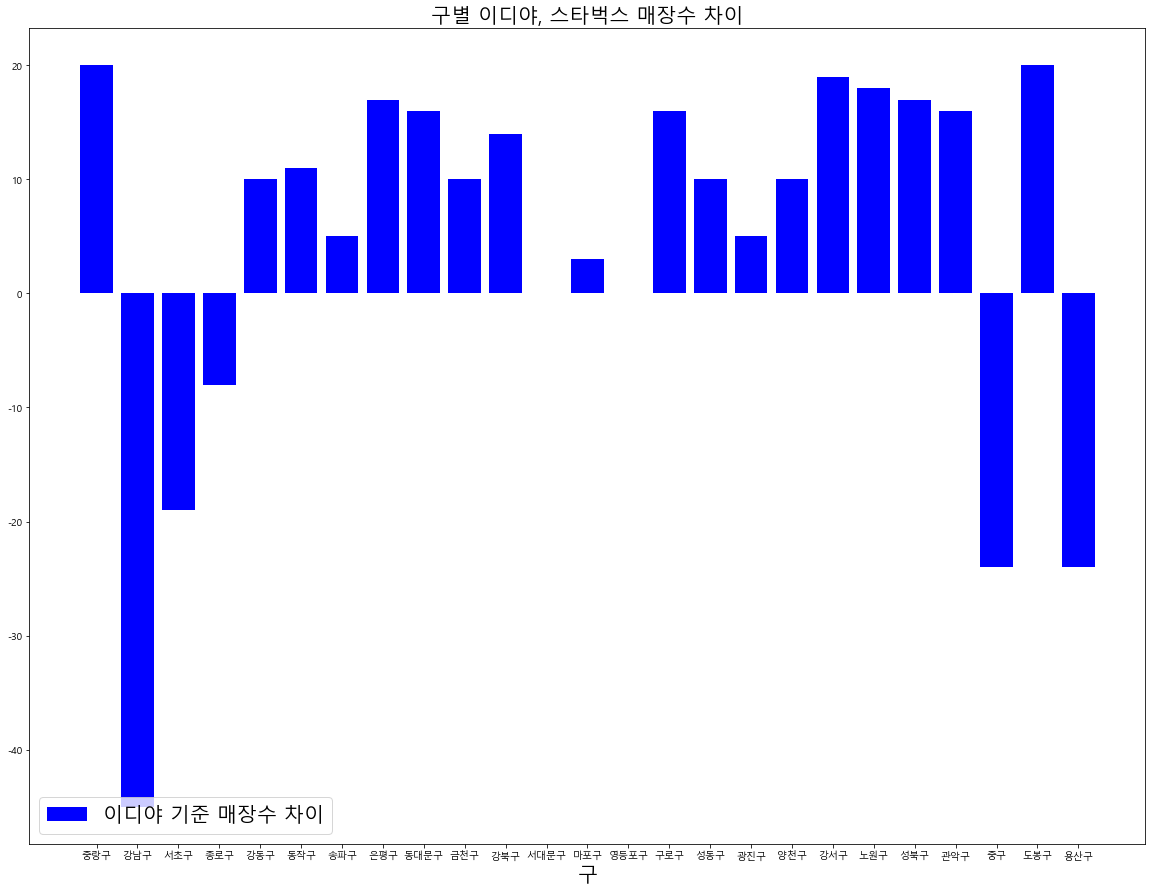

In [22]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()